# Modeling the North America Video Game Sales
Understand the features that influence North america video game sales


In [147]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [148]:
_  = os.path.join('Video_Games_Sales_as_at_22_Dec_2016.csv')
video_game_df = pd.read_csv(_)

Dropping features we don't have prior to release

In [153]:
na_df = video_game_df.drop(['EU_Sales', 
                            'JP_Sales', 
                            'Other_Sales', 
                            'Critic_Score',
                            'Critic_Count',
                            'User_Score',
                            'User_Count'], axis=1)

In [154]:
na_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,82.53,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,35.52,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,32.77,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,31.37,NaN,NaN


In [155]:
# Looking at NA _sales to see if column is float type

na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 9 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
Global_Sales       16719 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(3), object(6)
memory usage: 1.1+ MB


There are no nan values in Sales. But we observered some missing values in "Developer" and "Rating". 

Below we will check whether these missing values coming from older games or not.
 

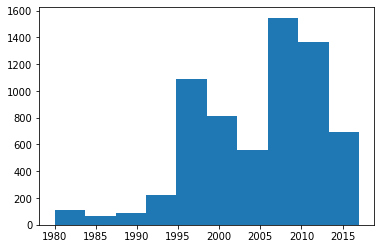

In [156]:
plt.hist(na_df[na_df.Developer.isna()].Year_of_Release.values)

plt.show()

It looks like it is not necessarily older games has missing values.

In [157]:
# recording missing value counts by year
na_df[na_df.Developer.isna()].Year_of_Release.value_counts().iloc[:10]

2010.0    451
2008.0    438
2011.0    409
2009.0    407
2007.0    376
1998.0    346
2006.0    326
1999.0    296
2012.0    285
1997.0    268
Name: Year_of_Release, dtype: int64

In [158]:
# Replacing null values with unknown
na_df['Developer'] = na_df['Developer'].replace(to_replace = np.nan, value = 'Unknown')

In [159]:
#Replacing null value of rating with unknown
na_df['Rating'] = na_df['Rating'].fillna('Unknown')

In [160]:
na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 9 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
Global_Sales       16719 non-null float64
Developer          16719 non-null object
Rating             16719 non-null object
dtypes: float64(3), object(6)
memory usage: 1.1+ MB


In [161]:
#Dropped all remaining null values
na_df.dropna(inplace=True)

In [162]:
na_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 9 columns):
Name               16416 non-null object
Platform           16416 non-null object
Year_of_Release    16416 non-null float64
Genre              16416 non-null object
Publisher          16416 non-null object
NA_Sales           16416 non-null float64
Global_Sales       16416 non-null float64
Developer          16416 non-null object
Rating             16416 non-null object
dtypes: float64(3), object(6)
memory usage: 1.3+ MB


In [163]:
na_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,82.53,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,40.24,Unknown,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,35.52,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,32.77,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,31.37,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.01,Unknown,Unknown
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,Unknown,Unknown
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.01,Unknown,Unknown
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.01,Unknown,Unknown


looking at how many value counts of platforms there are. 

We have 31 different consoles.

We will OneHotEncode the categories.

Tail will be determined.

In [164]:
na_df.Platform.value_counts()

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

looking at the different tyoes of genres

In [165]:
na_df.Genre.value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

looking at the number of publishers in our dataset

In [166]:
na_df.Publisher.value_counts()

Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          930
Konami Digital Entertainment     825
                                ... 
Phoenix Games                      1
Sony Music Entertainment           1
fonfun                             1
Naxat Soft                         1
New World Computing                1
Name: Publisher, Length: 579, dtype: int64

(array([555.,  11.,   3.,   1.,   1.,   3.,   3.,   1.,   0.,   1.]),
 array([1.0000e+00, 1.3530e+02, 2.6960e+02, 4.0390e+02, 5.3820e+02,
        6.7250e+02, 8.0680e+02, 9.4110e+02, 1.0754e+03, 1.2097e+03,
        1.3440e+03]),
 <a list of 10 Patch objects>)

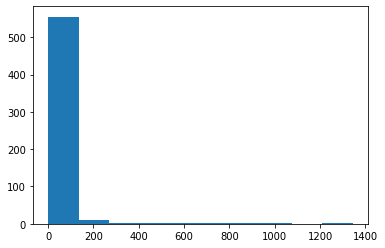

In [167]:
plt.hist(na_df.Publisher.value_counts())

In [168]:
na_df.Publisher.value_counts()[na_df['Publisher'].value_counts()<50]

Destineer                   45
GT Interactive              45
PQube                       45
DTP Entertainment           43
Alchemist                   43
                            ..
Phoenix Games                1
Sony Music Entertainment     1
fonfun                       1
Naxat Soft                   1
New World Computing          1
Name: Publisher, Length: 533, dtype: int64

In [169]:
len(na_df.Publisher.value_counts()[na_df['Publisher'].value_counts()<50])

533

For the initial modelling we will ignore the publisher name. Later on we need to decide/figure out how to move on this.

-- Find some threshold values for platform and OneHotEncode this column together with Genre. 

-- Subtract the minimum year from release year and if you want you can ignore certain years.

-- Fit a linear regression model to the data you created.

-- Find predicted values

-- Find residuals 

-- Plot residual on y-axis and plot predicted values on x-axis (Residual plots!!)

In [170]:
# All consoles release 2007 and later NO handheld allowed
handhelds=['DC', 'DS', 'GB', 'PSP', '3DS', 'PSV']
na_df = na_df[(na_df['Year_of_Release'] > 2007) & (na_df['Platform'].isin(handhelds) == False)]

#One hot encode the platform column and concat it to the main data
_ = pd.get_dummies(na_df['Platform'], drop_first=True)
na_df = pd.concat([na_df, _], axis=1)

In [171]:
na_df['Year_of_Release'] = na_df['Year_of_Release'] - na_df['Year_of_Release'].min()

In [172]:
#One hot encode the Genre column and concat it to the main data
_ = pd.get_dummies(na_df['Genre'], drop_first=True)
na_df = pd.concat([na_df, _], axis=1)

In [173]:
#One hot encode the Genre column and concat it to the main data
_ = pd.get_dummies(na_df['Genre'], drop_first=True)
na_df = pd.concat([na_df, _], axis=1)

In [174]:
#One hot encode the Genre column and concat it to the main data
_ = pd.get_dummies(na_df['Rating'], drop_first=True)
na_df = pd.concat([na_df, _], axis=1)

In [175]:
na_df = na_df.drop(columns=['Name', 'Genre', 'Platform', 'Developer', 'Rating'])

In [292]:
na_df.columns.tolist()

['Year_of_Release',
 'Publisher',
 'NA_Sales',
 'Global_Sales',
 'PS2',
 'PS3',
 'PS4',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne',
 'Adventure',
 'Fighting',
 'Misc',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Adventure',
 'Fighting',
 'Misc',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'E10+',
 'EC',
 'M',
 'RP',
 'T',
 'Unknown']

In [177]:
X = na_df.drop(columns=['NA_Sales'])
y = na_df['NA_Sales']

In [196]:
linreg = LinearRegression()
linreg.fit(X, y)
print('\n', linreg.coef_, linreg.intercept_)

ValueError: could not convert string to float: 'Nintendo'

In [179]:
publishers = na_df.Publisher.unique()

In [180]:
def publisher_sales(data):
    totals = []
    for publisher in publishers:
        company = data.loc[data['Publisher']==publisher]
        total = [publisher, company['NA_Sales'].sum()]
        totals.append(total)
    return totals

In [181]:
pub_df = pd.DataFrame(publisher_sales(na_df))

In [182]:
pub_df.sort_values(by = 1, ascending = True, inplace = True)

In [183]:
len(pub_df)/4

65.0

In [184]:
pub_df[:65]
other_pubs = pub_df[66:]

In [185]:
other_pubs[1].sum()
other_pubs = ['other', 1486.7]

In [186]:
other_pubs =pd.DataFrame(other_pubs)

In [135]:
other_pubs.T

,0,1
0,other,1486.7


In [291]:
na_df.columns.tolist()

['Year_of_Release',
 'Publisher',
 'NA_Sales',
 'Global_Sales',
 'PS2',
 'PS3',
 'PS4',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne',
 'Adventure',
 'Fighting',
 'Misc',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Adventure',
 'Fighting',
 'Misc',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'E10+',
 'EC',
 'M',
 'RP',
 'T',
 'Unknown']

In [216]:
# let's create the target variable from Global_Sales
y =na_df.Global_Sales

# drop target variable from the input variables and also Publisher for the first models.
X = na_df.drop(columns= ['NA_Sales', 'Global_Sales', 'Publisher'])

Make sure we don't touch test until the end of our modeling

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2 )

In [242]:
from sklearn.linear_model import LinearRegression

In [250]:
lr = LinearRegression()

In [251]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

In [252]:
residuals = y_train - y_pred

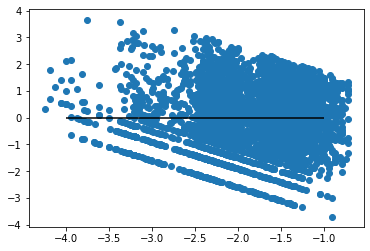

In [255]:
plt.scatter(y_pred, residuals)
plt.hlines(y = 0, xmin = -4, xmax = -1.0)

In [254]:
lr.score(X_train, y_train)

0.21928401088969296

In [277]:
from sklearn.linear_model import Ridge

In [287]:
ridge = Ridge(alpha=0.1, normalize = False)

ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [288]:
ridge.score(X_train, y_train)

0.21928381924916074

In [289]:
lasso.coef_

array([-0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
       -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,
       -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a227080d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a22708b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a226ed3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a22625590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a22625a90>],
 'means': []}

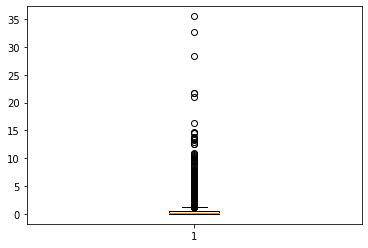

In [225]:
plt.boxplot(y)

In [248]:
## let's cut the outliers in y direction

y = np.log(na_df[na_df.Global_Sales < 2].Global_Sales)

X = na_df[na_df.Global_Sales < 2].drop(columns= ['NA_Sales', 'Global_Sales', 'Publisher'])

In [249]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2 )